In [14]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib notebook

In [15]:
train_data=pd.read_csv('train.csv')

In [16]:
train_data.head()

,id,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,formation_energy_ev_natom,bandgap_energy_ev
0,1,33,80.0,0.6250,0.3750,0.000,9.9523,8.5513,9.1775,90.0026,90.0023,90.0017,0.0680,3.4387
1,2,194,80.0,0.6250,0.3750,0.000,6.1840,6.1838,23.6287,90.0186,89.9980,120.0025,0.2490,2.9210
2,3,227,40.0,0.8125,0.1875,0.000,9.7510,5.6595,13.9630,90.9688,91.1228,30.5185,0.1821,2.7438
3,4,167,30.0,0.7500,0.0000,0.250,5.0036,5.0034,13.5318,89.9888,90.0119,120.0017,0.2172,3.3492
4,5,194,80.0,0.0000,0.6250,0.375,6.6614,6.6612,24.5813,89.9960,90.0006,119.9893,0.0505,1.3793


In [17]:
train_data.shape


(2400, 14)

In [18]:
test_data=pd.read_csv('test.csv')
test_data.head()

,id,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree
0,1,33,80.0,0.1875,0.4688,0.3438,10.5381,9.0141,9.6361,89.9997,90.0003,90.0006
1,2,33,80.0,0.7500,0.2500,0.0000,9.8938,8.5014,9.1298,90.0038,90.0023,90.0015
2,3,167,30.0,0.6667,0.1667,0.1667,4.9811,4.9808,13.4799,89.9900,90.0109,120.0014
3,4,12,80.0,0.5625,0.4375,0.0000,24.3370,6.0091,5.7620,89.9995,103.8581,90.0002
4,5,12,80.0,0.1875,0.5000,0.3125,24.6443,6.2906,6.1589,90.0000,104.5929,90.0001


In [19]:
train_data['spacegroup'].unique()

array([ 33, 194, 227, 167, 206,  12])

In [20]:
test_data['spacegroup'].unique()

array([ 33, 167,  12, 206, 194, 227])

## It seems that space groups are somewhat similar. We can use it as categorical data to simplify our model.

In [21]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 14 columns):
id                            2400 non-null int64
spacegroup                    2400 non-null int64
number_of_total_atoms         2400 non-null float64
percent_atom_al               2400 non-null float64
percent_atom_ga               2400 non-null float64
percent_atom_in               2400 non-null float64
lattice_vector_1_ang          2400 non-null float64
lattice_vector_2_ang          2400 non-null float64
lattice_vector_3_ang          2400 non-null float64
lattice_angle_alpha_degree    2400 non-null float64
lattice_angle_beta_degree     2400 non-null float64
lattice_angle_gamma_degree    2400 non-null float64
formation_energy_ev_natom     2400 non-null float64
bandgap_energy_ev             2400 non-null float64
dtypes: float64(12), int64(2)
memory usage: 262.6 KB


<IPython.core.display.Javascript object>


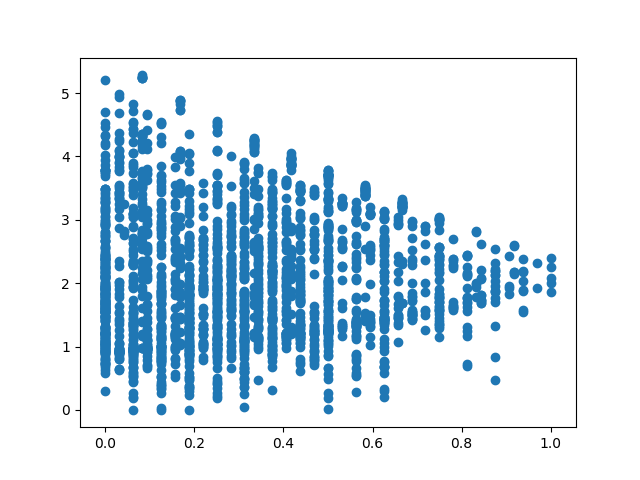

In [22]:
plt.figure()
plt.scatter(train_data['percent_atom_ga'],train_data['bandgap_energy_ev'])

<IPython.core.display.Javascript object>


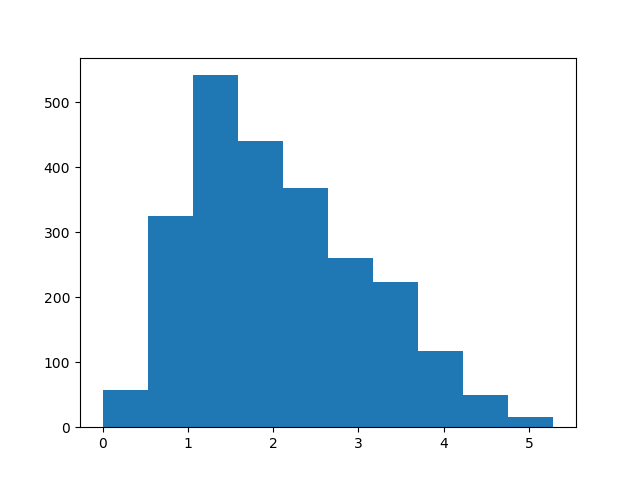

(array([  58.,  325.,  542.,  440.,  368.,  261.,  223.,  118.,   50.,   15.]),
 array([  1.00000000e-04,   5.28700000e-01,   1.05730000e+00,
          1.58590000e+00,   2.11450000e+00,   2.64310000e+00,
          3.17170000e+00,   3.70030000e+00,   4.22890000e+00,
          4.75750000e+00,   5.28610000e+00]),
 <a list of 10 Patch objects>)

In [23]:
plt.figure()
plt.hist(train_data['bandgap_energy_ev'])

<IPython.core.display.Javascript object>


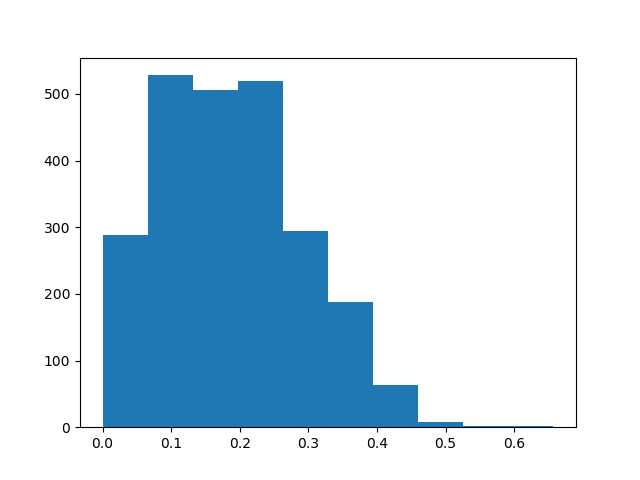

(array([ 289.,  528.,  506.,  519.,  294.,  188.,   64.,    8.,    2.,    2.]),
 array([ 0.     ,  0.06572,  0.13144,  0.19716,  0.26288,  0.3286 ,
         0.39432,  0.46004,  0.52576,  0.59148,  0.6572 ]),
 <a list of 10 Patch objects>)

In [24]:
plt.figure()
plt.hist(train_data['formation_energy_ev_natom'])

<IPython.core.display.Javascript object>


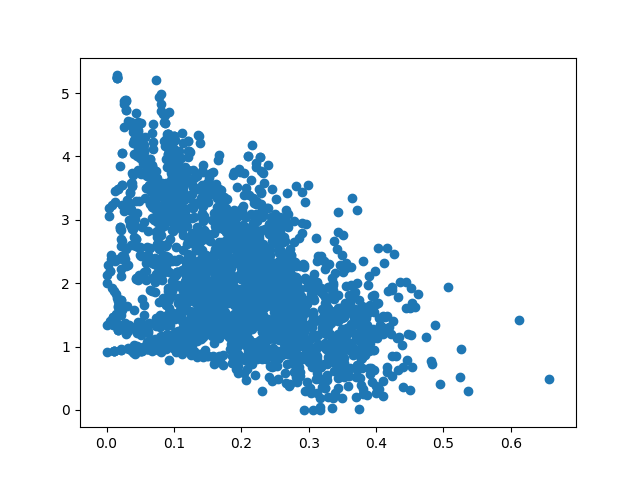

In [25]:
plt.figure()
plt.scatter(train_data['formation_energy_ev_natom'],train_data['bandgap_energy_ev'])